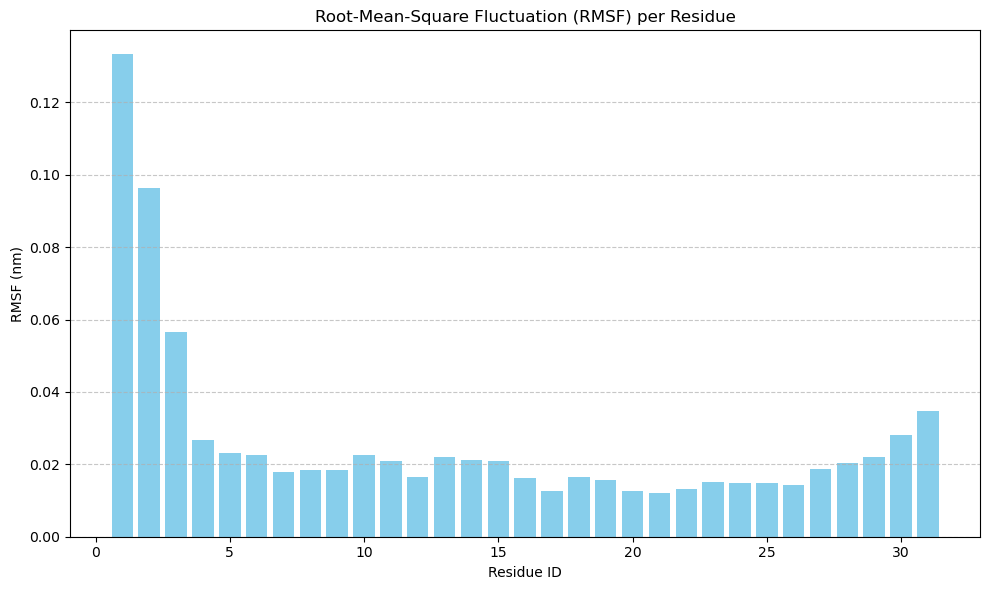

In [3]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load all PDB files into a single trajectory
# Adjust the path to the directory containing your PDB files
pdb_files = glob.glob('Outputs/*.pdb')
traj = md.load(pdb_files)

# Align/superimpose all structures based on alpha carbons (CA atoms)
ca_atoms = traj.top.select('name CA')  # Select only CA atoms for alignment
traj.superpose(traj, atom_indices=ca_atoms)

# Calculate the RMSF (root-mean-square fluctuation) for each CA atom
rmsf = md.rmsf(traj, traj[0], atom_indices=ca_atoms)

# Generate residue indices (IDs) for plotting
residue_indices = [atom.residue.index + 1 for atom in traj.top.atoms if atom.name == 'CA']

# Plot RMSF vs Residue ID
plt.figure(figsize=(10, 6))
plt.bar(residue_indices, rmsf, color='skyblue')
plt.xlabel('Residue ID')
plt.ylabel('RMSF (nm)')
plt.title('Root-Mean-Square Fluctuation (RMSF) per Residue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('Images/RMSF_per_Residue.png')  # Adjust path as needed
plt.show()
